## Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

## Reading the data in

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


## Data Exploration

Let's first have a descriptive exploration on our data.

In [3]:
# summarize the data
df.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


Let's select some features to explore more.

In [9]:
cdf = df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]
cdf.head(9)

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230
5,1.8,4,10.6,219
6,1.8,4,10.8,223
7,3.0,6,15.2,306
8,3.2,6,15.4,306


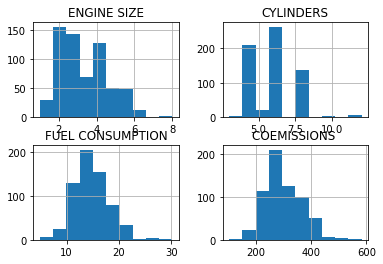

In [11]:
viz = cdf[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

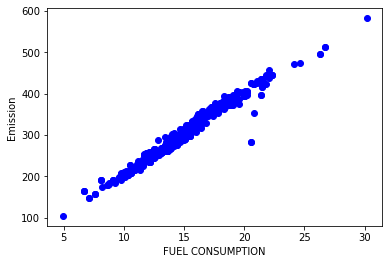

In [24]:
plt.scatter(cdf["FUEL CONSUMPTION"], cdf["COEMISSIONS "],  color='blue')
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("Emission")
plt.show()

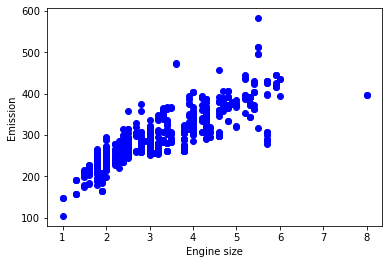

In [27]:
plt.scatter(cdf["ENGINE SIZE"], cdf["COEMISSIONS "],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice

Plot CYLINDER vs the Emission, to see how linear is their relationship is:

In [28]:
# write your code here

## Creating train and test dataset

In [29]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Train data distribution

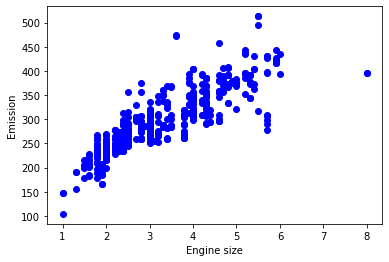

In [34]:
plt.scatter(train["ENGINE SIZE"], train["COEMISSIONS "],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Modeling

Using sklearn package to model data.

In [35]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINE SIZE']])
train_y = np.asanyarray(train[['COEMISSIONS ']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[44.71497073]]
Intercept:  [151.0858111]


## Plot outputs
We can plot the fit line over the data:

Text(0, 0.5, 'Emission')

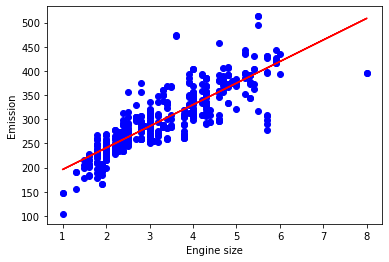

In [37]:
plt.scatter(train["ENGINE SIZE"], train["COEMISSIONS "],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation

In [39]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINE SIZE']])
test_y = np.asanyarray(test[['COEMISSIONS ']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 26.67
Residual sum of squares (MSE): 1269.15
R2-score: 0.72


# Polynomial regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  1.6 ,  2.56],
       [ 1.  ,  1.6 ,  2.56],
       [ 1.  ,  3.2 , 10.24],
       ...,
       [ 1.  ,  2.3 ,  5.29],
       [ 1.  ,  2.3 ,  5.29],
       [ 1.  ,  2.4 ,  5.76]])

In [42]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         84.42062746 -5.46663507]]
Intercept:  [87.99079375]


Text(0, 0.5, 'Emission')

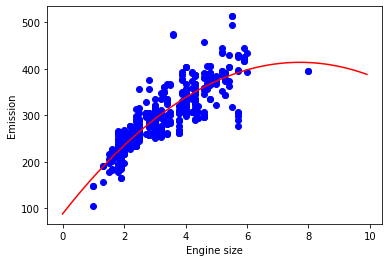

In [43]:
plt.scatter(train["ENGINE SIZE"], train["COEMISSIONS "],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation

In [44]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 27.61
Residual sum of squares (MSE): 1358.58
R2-score: 0.70


## Practice

Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [45]:
# write your code here